In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import json
from itertools import product
from glob import glob

folder_path = 'archieved_results/'

In [2]:

base = 'bert-base-multiple-seeds'
large = 'bert-large-multiple-seeds-freezing-point-4'
base_nofine_and_freeze = 'bert no finetuning and freezing layers'
ling_feats = 'linguistic features'
refining = 'refining strategy'


In [4]:
def read_json(file_name):
    results_json = f'{folder_path}/{file_name}.json'

    with open(results_json) as file:
        file_contents = file.read()
    return json.loads(file_contents)
    

In [24]:

paper_results = pd.read_csv(folder_path+'paper table 4 results.csv').sort_values(by=['dataset']).T

paper_results

#for _, row in paper_results.iterrows():
#    print('  & '.join([str(i) for i in row]))


,3,0,1,2,7,4,5,6
dataset,D1-lap14,D1-res14,D1-res15,D1-res16,D2-lap14,D2-res14,D2-res15,D2-res16
precision,61.46,71.85,59.89,65.08,61.7,71.21,61.54,65.62
recall,55.56,72.12,61.05,71.66,56.26,72.39,62.47,71.3
f1,58.32,71.98,60.38,68.18,58.81,71.78,61.93,68.33


<h1>BERT multiple seeds and BERT Large comparison</h1>

In [11]:
base_df = read_json(base)
rows = [{
        'dataset': base_df[i]['setup']['dataset'],
        'f1': base_df[i]['results']['test_set']['f1'],
        'precision': base_df[i]['results']['test_set']['precision'],
        'recall': base_df[i]['results']['test_set']['recall'],
        # 'seed': base_df[i]['setup']['model_param']['seed']
} for i in range(len(base))]

base_df = pd.DataFrame(rows)
base_df['model'] = 'Base'
base_df.head()

,dataset,f1,precision,recall,model
0,D1-res15,0.610202,0.580586,0.643002,Base
1,D1-lap14,0.574091,0.583333,0.565138,Base
2,D2-lap14,0.555241,0.567568,0.543438,Base
3,D1-res15,0.605416,0.578558,0.634888,Base
4,D2-lap14,0.593633,0.601518,0.585952,Base


In [22]:

mean_base = base_df.groupby(['dataset']).mean().T * 100
mean_base

#for _, row in mean_base.iterrows():
#    print('  & '.join([str(round(i, 2)) for i in row]))

C:\Users\karal\AppData\Local\Temp\ipykernel_8360\4077581131.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_base = base_df.groupby(['dataset']).mean().T * 100


dataset,D1-lap14,D1-res14,D1-res15,D1-res16,D2-lap14,D2-res14,D2-res15,D2-res16
f1,57.568728,71.449779,59.867208,68.522824,57.388419,71.188338,60.202785,65.014897
precision,59.983868,70.187608,59.130870,65.591133,58.505303,69.839075,59.695252,60.621263
recall,55.474006,72.841365,60.902637,71.797323,56.315465,72.600882,61.168385,70.175439


In [15]:
large_df = read_json(large)
rows = [{
        'dataset': large_df[i]['setup']['dataset'],
        'f1': large_df[i]['results']['test_set']['f1'],
        'precision': large_df[i]['results']['test_set']['precision'],
        'recall': large_df[i]['results']['test_set']['recall'],
        # 'seed': large_df[i]['setup']['model_param']['seed'],
        # 'freezing': large_df[i]['setup']['model_param']['freezing_point']
} for i in range(len(large_df))]

large_df = pd.DataFrame(rows)
large_df['model'] = 'Large'
large_df.head()

,dataset,f1,precision,recall,model
0,D2-res16,0.663569,0.634103,0.695906,Large
1,D2-res16,0.669261,0.667961,0.670565,Large
2,D2-res16,0.673778,0.619281,0.738791,Large
3,D2-res15,0.578544,0.540250,0.622680,Large
4,D2-lap14,0.543636,0.534884,0.552680,Large


In [23]:
mean_large = large_df.groupby(['dataset']).mean().T * 100
mean_large

#for _, row in mean_large.iterrows():
#    print('  & '.join([str(round(i, 2)) for i in row]))
    

C:\Users\karal\AppData\Local\Temp\ipykernel_8360\1720199433.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_large = large_df.groupby(['dataset']).mean().T * 100


dataset,D2-lap14,D2-res15,D2-res16
f1,57.887730,61.461787,66.802915
precision,59.256004,58.768772,64.806805
recall,56.709797,64.453608,69.200780


In [19]:

df = pd.concat([base_df, large_df])


Index(['dataset', 'f1', 'precision', 'recall', 'model'], dtype='object')
   model index      value
0   Base    f1  55.524079
1   Base    f1  59.363296
2   Base    f1  57.277883
3  Large    f1  54.363636
4  Large    f1  58.835143
5  Large    f1  57.992565
6  Large    f1  58.926829
7  Large    f1  59.320478


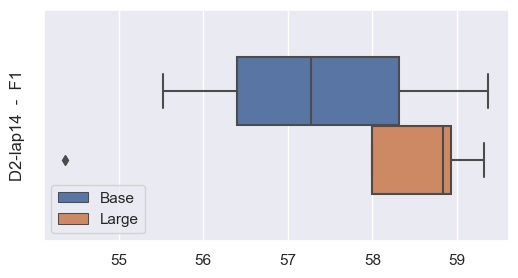

In [20]:
# for dataset in large_df['dataset'].unique():

# DATASET res15 16 lap14
# -------------------------
ds = 'D2-lap14'
# -------------------------


test = df[df['dataset'] == ds]
print(test.columns)
test = pd.melt(test,
        id_vars=['model'],
        value_vars=test.columns,
        var_name='index',
        value_name='value')

test = test[test['index'] =='f1'].reset_index(drop=True)
test['value'] = test.value.astype(float) * 100
print(test)

# 3.9 for small
sns.set(rc={'figure.figsize':(6, 3)})

box = sns.boxplot(data=test, x='value', y='index', hue='model', width=0.6)
box.set(yticklabels=[])  
plt.xlabel('')
plt.ylabel('')
plt.ylabel(f'{ds}  -  F1')
plt.legend(loc='lower left')

# plt.savefig(f'{ds}.png', dpi=300)


Index(['dataset', 'f1', 'precision', 'recall', 'model'], dtype='object')


Text(0.5, 0, 'F1')

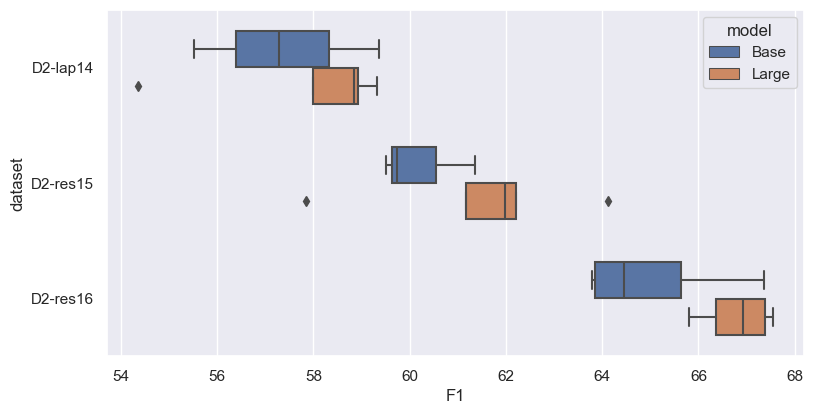

In [25]:
# test = df[df['dataset'] not in large_df['dataset'].unique().tolist() ]
test= df[df.dataset.isin(large_df['dataset'].unique().tolist())]
print(test.columns)
test = pd.melt(test,
        id_vars=['model', 'dataset'],
        value_vars=test.columns,
        var_name='index',
        value_name='value')

test = test[test['index'] =='f1'].reset_index(drop=True)
test['value'] = test.value.astype(float) * 100
# print(test)

sns.set(rc={'figure.figsize':(9, 4.5)})

sns.boxplot(data=test, x='value', y='dataset', hue='model', width=0.63)
plt.xlabel('F1')
# plt.savefig('box edge.png', dpi=300)


<h1>BERT no finetuning and partial freezing</h1>

In [7]:
df = read_json(base_nofine_and_freeze)
rows = [{
        'freezing' : str(df[i]['setup']['model_param'].get('freezing_point', 12)),
        'dataset': df[i]['setup']['dataset'],
        'precision': df[i]['results']['test_set']['precision'],
        'recall': df[i]['results']['test_set']['recall'],
        'f1': df[i]['results']['test_set']['f1']
} for i in range(len(df))]

df = pd.DataFrame(rows)
df['freezing'] = df.freezing.astype(int) + 1
df['f1'] = df['f1'] * 100
df.head()

,freezing,dataset,precision,recall,f1
0,13,D2-lap14,0.449304,0.417745,43.295019
1,13,D2-res14,0.640288,0.543235,58.778206
2,13,D2-res15,0.476415,0.416495,44.444444
3,13,D2-res16,0.516071,0.563353,53.867661
4,1,D2-res15,0.548885,0.659794,59.925094


In [8]:
df.sort_values(by=['dataset', 'freezing'], inplace=True)
datasets = df['dataset'].unique()

df_per_dataset = {dataset : df[df['dataset'] == dataset].drop(columns='dataset').reset_index(drop=True)
                  for dataset in datasets}


C:\Users\karal\AppData\Local\Temp\ipykernel_14832\941515419.py:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(40, 80, 10)


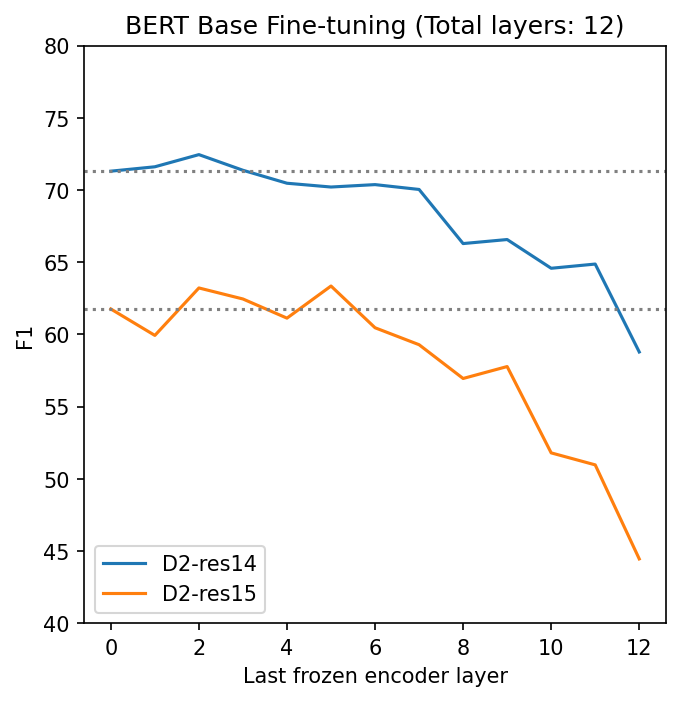

In [9]:
plt.rcParams['figure.dpi']= 150
plt.figure(figsize=(5,5))
for dataset, dataframe in df_per_dataset.items():
    x = range(dataframe.shape[0])
    if len(x) > 3 :
        plt.plot(x, dataframe['f1'], label=dataset)
        plt.axhline(y=dataframe[dataframe['freezing']==0]['f1'].values, color='grey', linestyle='dotted')
        
plt.ylim(40, 80, 10) 
plt.legend(loc='lower left')
plt.title('BERT Base Fine-tuning (Total layers: 12)')
plt.xlabel('Last frozen encoder layer')
plt.ylabel('F1')
# plt.savefig('bert base freeze.png', dpi=300)
plt.show()

<h1>Linguistic Features</h1>

In [10]:
df = read_json(ling_feats)
# print(df)

rows = [{
        'features' : str(df[i]['setup']['model_param']['use_features']),
        'dataset': df[i]['setup']['dataset'],
        'precision': df[i]['results']['test_set']['precision'],
        'recall': df[i]['results']['test_set']['recall'],
        'f1': df[i]['results']['test_set']['f1']
} for i in range(len(df))]

df = pd.DataFrame(rows)
df.drop_duplicates(inplace=True)

labels = {"['post']":'rpd', "['postag']":'psc', "['synpost']":'tbd', "['post', 'deprel']":"rpd + dep",
           "['post', 'deprel', 'postag', 'synpost']":'All LF', "['deprel']":'dep', '[]':'w/ LF'}

df['features'] = df['features'].apply(lambda x : labels[x])


df.sort_values(by=['f1'], inplace=True, ascending=False)
datasets =  df['dataset'].unique()
df_per_dataset = {dataset : df[df['dataset'] == dataset].drop(columns='dataset').reset_index(drop=True)
                  for dataset in datasets}

for dataset, df in df_per_dataset.items(): print(f'{dataset}\n{df}')

for feature in labels.values():
    print(feature, '&', end=' ')
    for dataset in sorted(df_per_dataset.keys()):
        df = df_per_dataset[dataset]
        print(round(float(df[df['features'] == feature]['f1'])* 100, 2) , '&', end=' ')
    print('\\\\')

D2-res14
    features  precision    recall        f1
0        psc   0.693396  0.747711  0.719530
1        rpd   0.692898  0.734486  0.713086
2     All LF   0.696411  0.730417  0.713009
3        dep   0.684866  0.727365  0.705476
4  rpd + dep   0.682857  0.729400  0.705362
5        tbd   0.662024  0.725331  0.692233
6      w/ LF   0.661932  0.711089  0.685630
D2-res16
    features  precision    recall        f1
0        tbd   0.659537  0.721248  0.689013
1        dep   0.649215  0.725146  0.685083
2  rpd + dep   0.651543  0.699805  0.674812
3        rpd   0.649635  0.693957  0.671065
4      w/ LF   0.639432  0.701754  0.669145
5        psc   0.598039  0.713450  0.650667
6     All LF   0.604377  0.699805  0.648600
D2-res15
    features  precision    recall        f1
0      w/ LF   0.623762  0.649485  0.636364
1  rpd + dep   0.634454  0.622680  0.628512
2        dep   0.622407  0.618557  0.620476
3     All LF   0.604743  0.630928  0.617558
4        tbd   0.619543  0.614433  0.616977
5    

In [11]:
results = {f : [] for f in ['All LF','w/ LF','psc','dep','rpd','tbd']}

for feature in results.keys():
    for dataset in sorted(df_per_dataset.keys()):
        df = df_per_dataset[dataset]
        value = round(float(df[df['features'] == feature]['f1'])* 100, 2)
        results[feature].append(value)
    

results = pd.DataFrame(results.values(), columns= sorted(df_per_dataset.keys()), index=['All','None','POS','DEP','RPD','TBD'])
annot = results.copy()
for dataset in results.columns:
    values = results[dataset].copy()
    for i in range(6):
        
        min_index = np.argmin(values)
        results[dataset].iloc[min_index] = i
        values[min_index] = 100

results

,D2-lap14,D2-res14,D2-res15,D2-res16
All,4.0,3.0,3.0,0.0
None,2.0,0.0,5.0,2.0
POS,1.0,5.0,1.0,1.0
DEP,3.0,2.0,4.0,4.0
RPD,5.0,4.0,0.0,3.0
TBD,0.0,1.0,2.0,5.0


<AxesSubplot: >

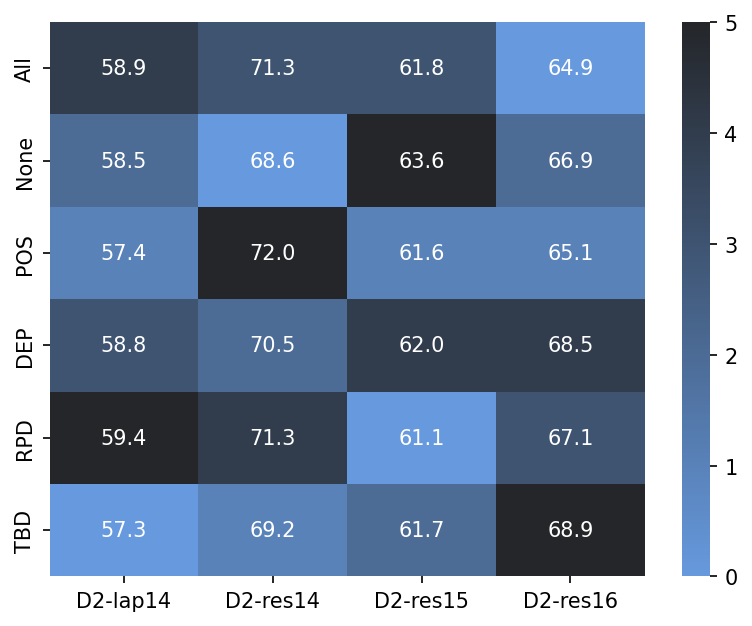

In [12]:
sns.heatmap(results, cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True), annot=annot, fmt='.1f')
#plt.xlabel('Dataset')
#plt.ylabel('LF included')
#sns.set(rc={'figure.figsize':(5,5)})
#plt.savefig('lf heatmap.png', dpi=300)



<h1>Refining strategy</h1>


In [13]:
def load_per_class(results):
    rows = [{
        'dataset': results[i]['setup']['dataset'],
        'refining': results[i]['setup']['model_param']['use_refining'],
        # 'precision': results[i]['results']['test_set']['precision'],
        # 'recall': results[i]['results']['test_set']['recall'],
        'f1': results[i]['results']['test_set']['f1'] * 100,
        
        # '+ precision': results[i]['results']['test_set']['positive precision'],
        # '+ recall': results[i]['results']['test_set']['positive recall'],
        'positive f1': results[i]['results']['test_set']['positive f1-score'] * 100,
    
        # 'o precision': results[i]['results']['test_set']['neutral precision'],
        # 'o recall': results[i]['results']['test_set']['neutral recall'],
        'neutral f1': results[i]['results']['test_set']['neutral f1-score'] * 100,
    
        # '- precision': results[i]['results']['test_set']['negative precision'],
        # '- recall': results[i]['results']['test_set']['negative recall'],
        'negative f1': results[i]['results']['test_set']['negative f1-score'] * 100
    
    } for i in range(len(results))]

    df = pd.DataFrame(rows)
    df['source'] = 'reproduced'
    return df


In [17]:
def make_stem_plot(variables, green_values, red_values, green_label='Green', red_label="Red", dataset=None):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.3,5), squeeze=True)

    markerline_1, stemlines_1, baseline_1 = ax.stem(variables, green_values)
    markerline_2, stemlines_2, baseline_2 = ax.stem(variables, red_values)


    plt.setp(markerline_1, color = '#F8766D', markersize = 10, markeredgewidth=1, label=red_label)
    plt.setp(stemlines_1, color = 'black')
    plt.setp(markerline_2, color = '#7CAE00', markersize = 10, markeredgewidth=1, label=green_label)
    plt.setp(stemlines_2, color = 'black')

    ax.grid(axis='y')

    #plt.xticks(rotation=4)
    #plt.yticks(np.arange(40, 100, 5.0))

    plt.legend(numpoints=1, fontsize=10)
    plt.xticks(variables)
    plt.ylabel("F1 difference")
    plt.title(ds)
    
    #plt.savefig(f'{ds}.png', dpi=300)
    plt.show()

In [14]:

ds = 'D2-lap14'

paper = pd.read_csv(f'{folder_path}/refining paper.csv')

paper.sort_values(by=['refining', 'dataset'], inplace=True)
# paper['source'] = 'paper'
paper = paper[(paper['dataset'] == ds)].drop(['dataset'], axis=1)
print(paper)
diff_paper =  paper.set_index('refining').diff().iloc[1]
diff_paper


   refining     f1  positive f1  neutral f1  negative f1
7         0  56.72        67.31       16.08        52.74
3         1  58.81        67.74       19.14        56.20


f1             2.09
positive f1    0.43
neutral f1     3.06
negative f1    3.46
Name: 1, dtype: float64

In [15]:
df = read_json(refining)
df= load_per_class(df)
df = df[(df['dataset'] == ds)].drop(['dataset', 'source'], axis=1)
print(df)
diff_repro =  df.set_index('refining').diff().iloc[1]
diff_repro

   refining         f1  positive f1  neutral f1  negative f1
0         0  57.859209    66.486486   11.560694    57.010786
4         1  58.485139    66.982922   15.873016    54.743390


f1             0.625930
positive f1    0.496436
neutral f1     4.312322
negative f1   -2.267395
Name: 1, dtype: float64

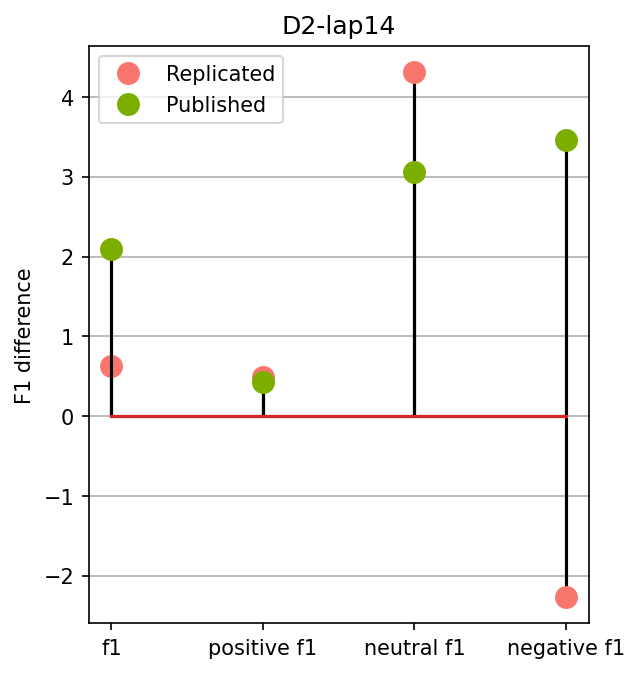

In [18]:
make_stem_plot(diff_paper.keys(), list(diff_repro), list(diff_paper), green_label='Published', red_label='Replicated',dataset=ds)


<h1>GPU runtime</h1>

In [85]:
import re

files = glob(f"{folder_path}*.json")
runtime = []
for file in files:
    file = re.findall(r'\\.+.json', file)[0][1:-5]
    print(file)
    df = read_json(file)
    df = [{
        'experiment' : file,
        'gpu': df[i]['setup']['device'],
        'runtime': df[i]['results']['training_time']
    
    } for i in range(len(df))]
    
    runtime.extend(df)
    
#print(df)
runtime = pd.DataFrame(runtime)
runtime

bert no finetuning and freezing layers
bert-base-multiple-seeds
bert-large-multiple-seeds-freezing-point-4
bert-large-unfreeze
bert-medium-unfreeze
linguistic features
refining strategy


,experiment,gpu,runtime
0,bert no finetuning and freezing layers,NVIDIA GeForce RTX 3050 Laptop GPU,2576.001014
1,bert no finetuning and freezing layers,NVIDIA GeForce RTX 3050 Laptop GPU,3414.273841
2,bert no finetuning and freezing layers,NVIDIA GeForce RTX 3050 Laptop GPU,1818.846406
3,bert no finetuning and freezing layers,NVIDIA GeForce RTX 3050 Laptop GPU,2520.891222
4,bert no finetuning and freezing layers,NVIDIA GeForce RTX 3050 Laptop GPU,2530.145962
...,...,...,...
138,refining strategy,NVIDIA GeForce RTX 3050 Laptop GPU,3234.908318
139,refining strategy,NVIDIA GeForce RTX 3050 Laptop GPU,3480.633645
140,refining strategy,NVIDIA GeForce RTX 3050 Laptop GPU,4584.418371
141,refining strategy,NVIDIA GeForce RTX 3050 Laptop GPU,2253.567854


In [93]:
runtime[['gpu', 'experiment']].drop_duplicates().reset_index()

,index,gpu,experiment
0,0,NVIDIA GeForce RTX 3050 Laptop GPU,bert no finetuning and freezing layers
1,30,NVIDIA RTX A5000,bert-base-multiple-seeds
2,70,NVIDIA RTX A6000,bert-large-multiple-seeds-freezing-point-4
3,85,NVIDIA RTX A5000,bert-large-unfreeze
4,91,NVIDIA RTX A6000,bert-medium-unfreeze
5,105,NVIDIA GeForce RTX 3050 Laptop GPU,linguistic features
6,135,NVIDIA GeForce RTX 3050 Laptop GPU,refining strategy


In [87]:
runtime.groupby(['gpu']).count()

,experiment,runtime
gpu,,
NVIDIA GeForce RTX 3050 Laptop GPU,68,68
NVIDIA RTX A5000,46,46
NVIDIA RTX A6000,29,29


In [97]:
runtime.groupby(['experiment']).count()

,gpu,runtime
experiment,,
bert no finetuning and freezing layers,30,30
bert-base-multiple-seeds,40,40
bert-large-multiple-seeds-freezing-point-4,15,15
bert-large-unfreeze,6,6
bert-medium-unfreeze,14,14
linguistic features,30,30
refining strategy,8,8


In [99]:
(runtime[['gpu', 'runtime']].groupby(['gpu']).sum() / 3600)

,runtime
gpu,
NVIDIA GeForce RTX 3050 Laptop GPU,62.441974
NVIDIA RTX A5000,15.022783
NVIDIA RTX A6000,8.609766


In [92]:
(runtime[['experiment', 'runtime']].groupby(['experiment']).sum() / 3600)

,runtime
experiment,
bert no finetuning and freezing layers,27.496737
bert-base-multiple-seeds,10.219713
bert-large-multiple-seeds-freezing-point-4,6.822673
bert-large-unfreeze,4.803070
bert-medium-unfreeze,1.787093
linguistic features,27.432073
refining strategy,7.513165
